# Figure Test


In [32]:
import os.path
import cv2
import logging

import numpy as np
import torch
import torch.nn.functional as F
from datetime import datetime
from collections import OrderedDict
import hdf5storage

from utils import utils_model
from utils import utils_logger
from utils import utils_sisr as sr
from utils import utils_image as util
from utils.utils_resizer import Resizer
from functools import partial

# from guided_diffusion import dist_util
from guided_diffusion.script_util import (
    NUM_CLASSES,
    model_and_diffusion_defaults,
    create_model_and_diffusion,
    args_to_dict,
)

import matplotlib.pyplot as plt

In [33]:
from PIL import Image

# Path to the image
image_path = 'testsets/train/img-0.png'

# Open the image file
with Image.open(image_path) as img:
    # Get the dimensions
    width, height = img.size

# Print the size
print(f'The size of the image is {width}x{height} pixels')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zhuohe/Library/CloudStorage/OneDrive-Personal/Documnets/Research/Projects/VBA/Code/DiffPIR/testsets/train/img-0.png'

The size of the image is 256x256 pixels


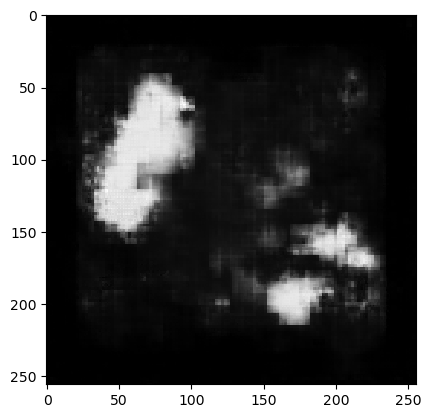

In [37]:
from PIL import Image
noise_level_img         = 12.75/255.0  
# Path to the image
img = 'testsets/demo_li_lower/down_img-0.png'

img_H = util.imread_uint(img, n_channels=3)
img_H = util.modcrop(img_H, 4)  # modcrop
img_L = util.imresize_np(util.uint2single(img_H), 1/4)

np.random.seed(seed=0)  # for reproducibility
img_L = img_L * 2 - 1
img_L += np.random.normal(0, noise_level_img * 2, img_L.shape) # add AWGN 
img_L = img_L / 2 + 0.5

# Print the size
print(f'The size of the image is {width}x{height} pixels')

util.imshow(img_H)

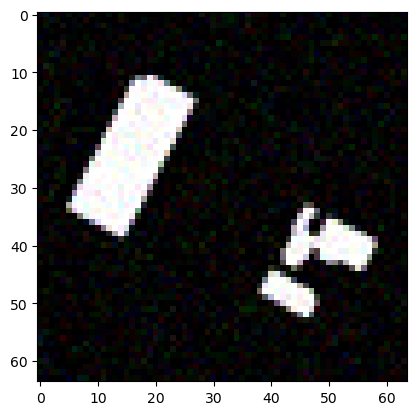

In [31]:
img = util.read_img("li_figures/demo_li_lower_sr_DiffPIR_blur[4]_diffusion_ffhq_10m_NFE100_eta0.0_zeta0.1_lambda1.0/down_img-0_x4_k2_LR.png")
util.imshow(img)

In [5]:
# Split the image into upper and lower
import os
from PIL import Image

# Directories
input_dir = 'testsets/train'
output_dir_up = 'testsets/li_upper'
output_dir_down = 'testsets/li_lower'

# Create output directories if they don't exist
os.makedirs(output_dir_up, exist_ok=True)
os.makedirs(output_dir_down, exist_ok=True)

# Process each PNG file in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.png'):
        # Open the image file
        image_path = os.path.join(input_dir, filename)
        with Image.open(image_path) as img:
            # Check if the image is 256x512
            if img.size == (256, 512):
                # Cut the image into two 256x256 images
                upper_part = img.crop((0, 0, 256, 256))
                lower_part = img.crop((0, 256, 256, 512))
                
                # Save the upper part
                upper_part_path = os.path.join(output_dir_up, f'upper_{filename}')
                upper_part.save(upper_part_path)
                
                # Save the lower part
                lower_part_path = os.path.join(output_dir_down, f'lower_{filename}')
                lower_part.save(lower_part_path)
                
                print(f'Processed {filename}')
            else:
                print(f'Skipping {filename}: not 256x512 size')

print('Processing complete.')

Processed img-94.png
Processed img-947.png
Processed img-80.png
Processed img-953.png
Processed img-984.png
Processed img-57.png
Processed img-990.png
Processed img-748.png
Processed img-43.png
Processed img-760.png
Processed img-774.png
Processed img-589.png
Processed img-238.png
Processed img-562.png
Processed img-204.png
Processed img-210.png
Processed img-576.png
Processed img-358.png
Processed img-416.png
Processed img-370.png
Processed img-364.png
Processed img-402.png
Processed img-833.png
Processed img-827.png
Processed img-199.png
Processed img-628.png
Processed img-172.png
Processed img-614.png
Processed img-600.png
Processed img-166.png
Processed img-601.png
Processed img-167.png
Processed img-173.png
Processed img-615.png
Processed img-629.png
Processed img-826.png
Processed img-198.png
Processed img-832.png
Processed img-365.png
Processed img-403.png
Processed img-417.png
Processed img-371.png
Processed img-359.png
Processed img-211.png
Processed img-577.png
Processed img-

In [2]:
import torch

def inspect_checkpoint(checkpoint_path):
    # Load the checkpoint
    checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
    
    # Print out the keys in the checkpoint dictionary
    print("Keys in the checkpoint dictionary:")
    for key in checkpoint.keys():
        print(key)
    
    # If the checkpoint contains model state_dict, print the parameters
    if 'state_dict' in checkpoint:
        print("\nModel parameters:")
        for param_tensor in checkpoint['state_dict']:
            print(f"{param_tensor}: {checkpoint['state_dict'][param_tensor].size()}")
    else:
        # Print the entire dictionary if state_dict is not found
        print("\nCheckpoint contents:")
        for key, value in checkpoint.items():
            print(f"{key}: {type(value)}")
            if isinstance(value, dict):
                for sub_key, sub_value in value.items():
                    print(f"  {sub_key}: {type(sub_value)}")
            elif isinstance(value, torch.Tensor):
                print(f"  {value.size()}")
            else:
                print(f"  {value}")

# Example usage
checkpoint_path = 'model_zoo/diffusion_ffhq_10m.pt'
inspect_checkpoint(checkpoint_path)

Keys in the checkpoint dictionary:
time_embed.0.weight
time_embed.0.bias
time_embed.2.weight
time_embed.2.bias
input_blocks.0.0.weight
input_blocks.0.0.bias
input_blocks.1.0.in_layers.0.weight
input_blocks.1.0.in_layers.0.bias
input_blocks.1.0.in_layers.2.weight
input_blocks.1.0.in_layers.2.bias
input_blocks.1.0.emb_layers.1.weight
input_blocks.1.0.emb_layers.1.bias
input_blocks.1.0.out_layers.0.weight
input_blocks.1.0.out_layers.0.bias
input_blocks.1.0.out_layers.3.weight
input_blocks.1.0.out_layers.3.bias
input_blocks.2.0.in_layers.0.weight
input_blocks.2.0.in_layers.0.bias
input_blocks.2.0.in_layers.2.weight
input_blocks.2.0.in_layers.2.bias
input_blocks.2.0.emb_layers.1.weight
input_blocks.2.0.emb_layers.1.bias
input_blocks.2.0.out_layers.0.weight
input_blocks.2.0.out_layers.0.bias
input_blocks.2.0.out_layers.3.weight
input_blocks.2.0.out_layers.3.bias
input_blocks.3.0.in_layers.0.weight
input_blocks.3.0.in_layers.0.bias
input_blocks.3.0.in_layers.2.weight
input_blocks.3.0.in_layer

In [4]:
import torch

def inspect_checkpoint(checkpoint_path):
    # Load the checkpoint
    checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
    
    # Print out the keys in the checkpoint dictionary
    print("Keys in the checkpoint dictionary:")
    for key in checkpoint.keys():
        print(key)
    
    # If the checkpoint contains model state_dict, print the parameters
    if 'state_dict' in checkpoint:
        print("\nModel parameters:")
        for param_tensor in checkpoint['state_dict']:
            print(f"{param_tensor}: {checkpoint['state_dict'][param_tensor].size()}")
    else:
        # Print the entire dictionary if state_dict is not found
        print("\nCheckpoint contents:")
        for key, value in checkpoint.items():
            print(f"{key}: {type(value)}")
            if isinstance(value, dict):
                for sub_key, sub_value in value.items():
                    print(f"  {sub_key}: {type(sub_value)}")
            elif isinstance(value, torch.Tensor):
                print(f"  {value.size()}")
            else:
                print(f"  {value}")

# Example usage
checkpoint_path = 'model_zoo/model000000.pt'
inspect_checkpoint(checkpoint_path)

Keys in the checkpoint dictionary:
time_embed.0.weight
time_embed.0.bias
time_embed.2.weight
time_embed.2.bias
input_blocks.0.0.weight
input_blocks.0.0.bias
input_blocks.1.0.in_layers.0.weight
input_blocks.1.0.in_layers.0.bias
input_blocks.1.0.in_layers.2.weight
input_blocks.1.0.in_layers.2.bias
input_blocks.1.0.emb_layers.1.weight
input_blocks.1.0.emb_layers.1.bias
input_blocks.1.0.out_layers.0.weight
input_blocks.1.0.out_layers.0.bias
input_blocks.1.0.out_layers.3.weight
input_blocks.1.0.out_layers.3.bias
input_blocks.2.0.op.weight
input_blocks.2.0.op.bias
input_blocks.3.0.in_layers.0.weight
input_blocks.3.0.in_layers.0.bias
input_blocks.3.0.in_layers.2.weight
input_blocks.3.0.in_layers.2.bias
input_blocks.3.0.emb_layers.1.weight
input_blocks.3.0.emb_layers.1.bias
input_blocks.3.0.out_layers.0.weight
input_blocks.3.0.out_layers.0.bias
input_blocks.3.0.out_layers.3.weight
input_blocks.3.0.out_layers.3.bias
input_blocks.4.0.op.weight
input_blocks.4.0.op.bias
input_blocks.5.0.in_layers.